# Image Classification

In [1]:
use_colab = True
assert use_colab in [True, False]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import os

tf.__version__

'2.3.0'

In [4]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.cifar10.load_data()

train_data, valid_data, train_labels, valid_labels = \
    train_test_split(train_data, train_labels, test_size=0.1, shuffle=True)

# 데이터 노말라이즈
train_data = train_data / 255
train_labels = train_labels.reshape([-1])

valid_data = valid_data / 255
valid_labels = valid_labels.reshape([-1])

test_data = test_data / 255
test_labels = test_labels.reshape([-1])



170500096/170498071 [==============================] - 3s 0us/step


In [5]:
print(train_data.shape)

(45000, 32, 32, 3)


In [6]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=10)
  return image, label

In [7]:
batch_size = 128
max_epochs = 200


N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

M = len(valid_data)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_data, valid_labels))
valid_dataset = valid_dataset.map(one_hot_label)
valid_dataset = valid_dataset.repeat().batch(batch_size=batch_size)
print(valid_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.repeat().batch(batch_size=batch_size)
print(test_dataset)


<BatchDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.float64, tf.float32)>
<BatchDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.float64, tf.float32)>
<BatchDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.float64, tf.float32)>


In [8]:
# the save point
if use_colab:
    checkpoint_dir ='./drive/My Drive/train_ckpt/cifar10_classification/exp1'
else:
    checkpoint_dir = 'cifar10_classification/exp1'

if not os.path.isdir(checkpoint_dir):
    os.makedirs(checkpoint_dir)    

label = 3


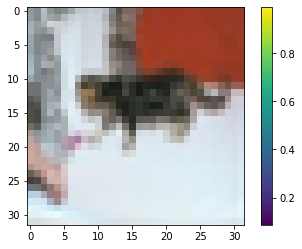

In [9]:
index = 9
print(f'label = {train_labels[index]}')
plt.imshow(train_data[index].reshape(32, 32, 3))
plt.colorbar()
plt.show()

In [10]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32 ,3), kernel_initializer=tf.keras.initializers.he_normal()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), kernel_initializer=tf.keras.initializers.he_normal()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=tf.keras.initializers.he_normal()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), kernel_initializer=tf.keras.initializers.he_normal()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
 
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0

In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

In [14]:
history = model.fit(train_dataset,                     
                    steps_per_epoch=len(train_data) // batch_size,
                    epochs=max_epochs, 
                    validation_data=valid_dataset,
                    validation_steps=len(valid_data) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/200
351/351 [==============================] - ETA: 0s - loss: 2.2608 - accuracy: 0.2538
Epoch 00001: val_loss improved from inf to 3.13764, saving model to ./drive/My Drive/train_ckpt/cifar10_classification/exp1
351/351 [==============================] - 7s 20ms/step - loss: 2.2608 - accuracy: 0.2538 - val_loss: 3.1376 - val_accuracy: 0.1338
Epoch 2/200
350/351 [============================>.] - ETA: 0s - loss: 1.8552 - accuracy: 0.3553
Epoch 00002: val_loss improved from 3.13764 to 2.68759, saving model to ./drive/My Drive/train_ckpt/cifar10_classification/exp1
351/351 [==============================] - 7s 19ms/step - loss: 1.8550 - accuracy: 0.3555 - val_loss: 2.6876 - val_accuracy: 0.1957
Epoch 3/200
349/351 [============================>.] - ETA: 0s - loss: 1.6916 - accuracy: 0.3998
Epoch 00003: val_loss improved from 2.68759 to 2.55209, saving model to ./drive/My Drive/train_ckpt/cifar10_classification/exp1
351/351 [==============================] - 7s 19ms/step - loss: 1

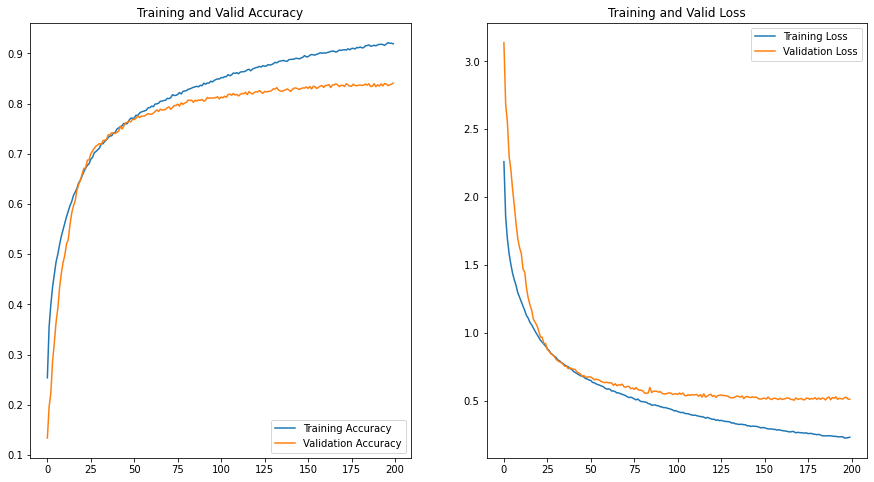

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valid Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Valid Loss')
plt.show()

In [16]:
model.load_weights(checkpoint_dir)
results = model.evaluate(test_dataset, steps=len(test_data) // batch_size)

78/78 [==============================] - 1s 10ms/step - loss: 0.5335 - accuracy: 0.8262


In [17]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.533
accuracy value: 82.6222%


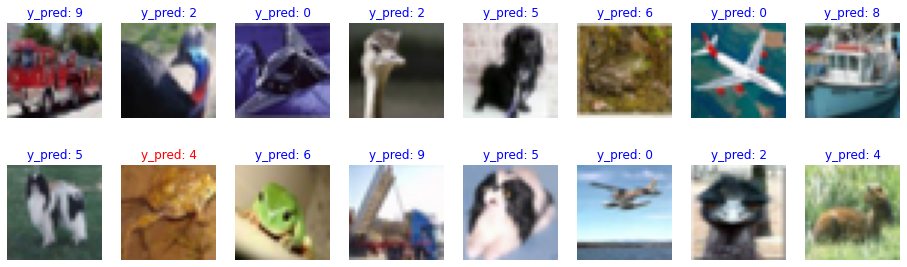

In [18]:
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(32, 32, 3))
  p.axis('off')